In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

from datetime import date, timedelta
from joypy import joyplot
from pandas.api.types import CategoricalDtype

warnings.filterwarnings("ignore")

In [9]:
import pandas as pd
import numpy as np
from datetime import date, timedelta
from pandas.api.types import CategoricalDtype

# Define the month-wise mean temperatures and standard deviations
max_temps = [20.5, 24.6, 30.4, 36.9, 40.9, 39, 35.8, 34.5, 34.3, 33.1, 28.3, 23]
min_temps = [7.6, 10.8, 15.7, 21.3, 25.6, 27.6, 27.3, 26.6, 24.9, 19.3, 12.9, 8.3]
std_devs = [1, 2, 3]
months = ['January', 'February', 'March', 'April', 'May', 'June',
          'July', 'August', 'September', 'October', 'November', 'December']

# Generate data for each day in the year
start_date = date(2023, 1, 1)
end_date = date(2023, 12, 31)

data = []  # Use a list for better performance

current_date = start_date
while current_date <= end_date:
    month = current_date.month - 1  # Adjust to 0-based index for lists
    max_temp = np.random.normal(max_temps[month], np.random.choice(std_devs))
    min_temp = np.random.normal(min_temps[month], np.random.choice(std_devs))

    # Store row data in a list instead of appending to DataFrame
    data.append([current_date.day, months[month], min_temp, max_temp])

    # Move to the next day
    current_date += timedelta(days=1)

# Convert list to DataFrame efficiently
df = pd.DataFrame(data, columns=['Day', 'Month', 'min_temp', 'max_temp'])

# Set Month as a categorical variable
df['Month'] = df['Month'].astype(CategoricalDtype(months))

# Display first 5 rows
print(df.head())


   Day    Month  min_temp   max_temp
0    1  January  7.286376  19.004221
1    2  January  7.804521  21.301390
2    3  January  8.308131  20.130036
3    4  January  4.246156  20.892035
4    5  January  7.368927  19.772520


<Figure size 1200x800 with 0 Axes>

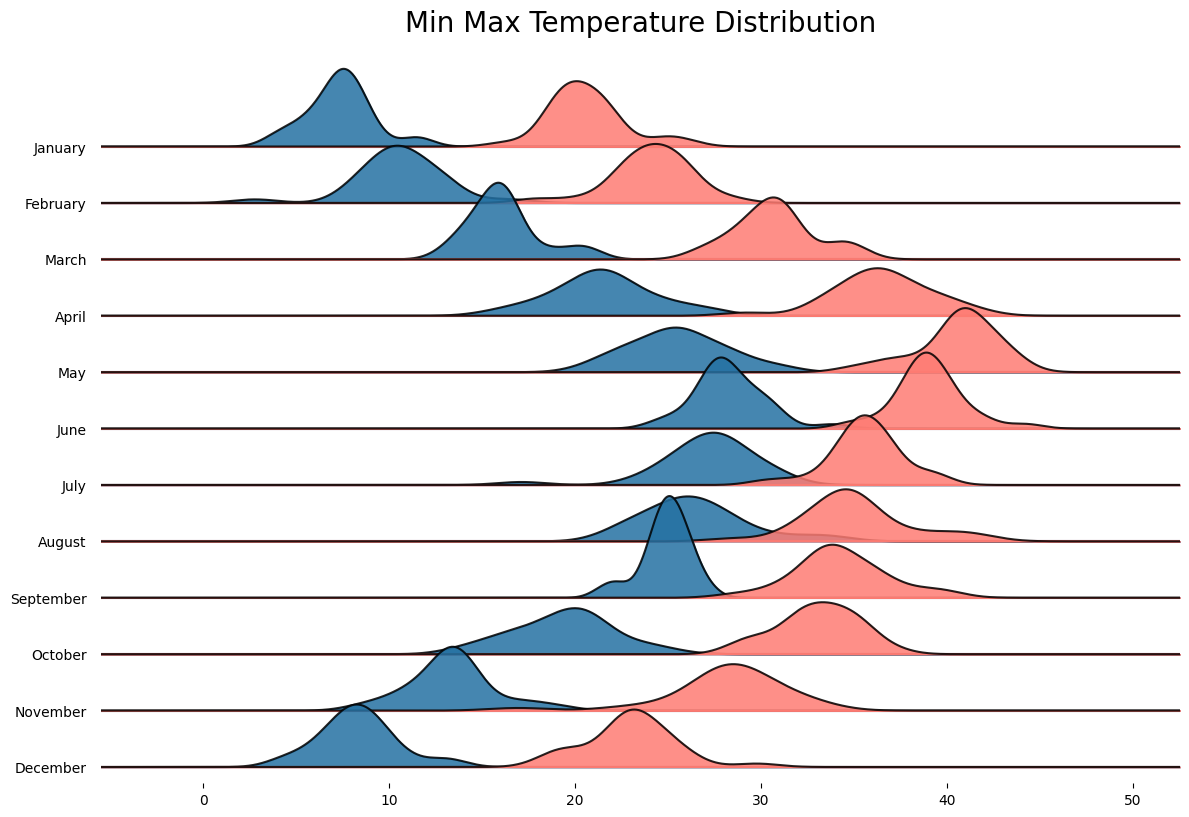

In [10]:
import matplotlib.pyplot as plt
from joypy import joyplot

# Ensure the figure is created properly
plt.figure(figsize=(12, 8))

# Generate the joyplot
joyplot(
    data=df[['min_temp', 'max_temp', 'Month']], 
    by='Month',
    column=['min_temp', 'max_temp'],
    color=['#2471A3', '#fe7c73'],
    alpha=0.85,
    figsize=(12, 8)
)

# Add a title
plt.title('Min Max Temperature Distribution', fontsize=20)

# Show the plot
plt.show()
